In [3]:
import pandas as pd
import xarray as xr
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

In [5]:
base_headers = ['Ens', 'YR', 'MO', 'DA', 'HH', 'MM', 'SS',
                'Pit', 'Rol', 'Hea', 'Tem', 'Dep']
eas_bins = [f'Eas_{i}' for i in range(1, 36)]
nor_bins = [f'Nor_{i}' for i in range(1, 36)]
ver_bins = [f'Ver_{i}' for i in range(1, 36)]
column_names = base_headers + eas_bins + nor_bins + ver_bins

df = pd.read_csv(
    'Mooring_data_CalVal/WHS300_SN8693_75m - WHS300_SN8693_75m.csv',
    skiprows=22,            
    names=column_names,     
    na_values=[''],         # empty strings are NaN
)

df = df.apply(pd.to_numeric, errors='coerce')

/var/folders/7d/76c27lb97m18k6jd1mcn12yc0000gn/T/ipykernel_34540/1832795913.py:8: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


In [7]:
df

,Ens,YR,MO,DA,HH,MM,SS,Pit,Rol,Hea,...,Ver_26,Ver_27,Ver_28,Ver_29,Ver_30,Ver_31,Ver_32,Ver_33,Ver_34,Ver_35
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,22.0,10.0,27.0,8.0,17.0,30.0,-3.82,2.67,110.11,...,-14.0,-6.0,-3.0,-9.0,-6.0,-3.0,-2.0,-2.0,5.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8291,8288.0,23.0,10.0,7.0,15.0,17.0,29.0,-2.34,2.08,73.02,...,-3.0,-4.0,-5.0,-5.0,0.0,-2.0,-1.0,-5.0,-18.0,-12.0
8292,8289.0,23.0,10.0,7.0,16.0,17.0,29.0,-2.15,1.89,71.31,...,-8.0,-10.0,-13.0,-1.0,-19.0,19.0,20.0,0.0,12.0,-26.0
8293,8290.0,23.0,10.0,7.0,17.0,17.0,29.0,-2.15,1.81,65.67,...,-5.0,1.0,3.0,5.0,6.0,1.0,4.0,-1.0,20.0,-9.0
8294,8291.0,23.0,10.0,7.0,18.0,17.0,29.0,-2.36,1.75,72.63,...,-7.0,0.0,6.0,1.0,6.0,6.0,1.0,-6.0,21.0,-12.0


In [9]:
# Extract velocity bins 1 to 34
velocity_east = df.loc[4:, 'Eas_1':'Eas_35']
velocity_north = df.loc[4:, 'Nor_1':'Nor_35']
depth = df.loc[4:,'Dep']
year = df.loc[4:, 'YR']
month = df.loc[4:, 'MO']
day = df.loc[4:, 'DA']
# hour = df.loc[4:, 'HH']
hour = df[['HH']].iloc[4:, 0]
minute = df.loc[4:, 'MM']
sec = df.loc[4:, 'SS']
roll = df.loc[4:,'Rol']
pitch = df.loc[4:,'Pit']
heading = df.loc[4:,'Hea']

In [11]:
velocity_north

,Nor_1,Nor_2,Nor_3,Nor_4,Nor_5,Nor_6,Nor_7,Nor_8,Nor_9,Nor_10,...,Nor_26,Nor_27,Nor_28,Nor_29,Nor_30,Nor_31,Nor_32,Nor_33,Nor_34,Nor_35
4,-221.0,-222.0,-209.0,-204.0,-202.0,-169.0,-105.0,-50.0,-34.0,-71.0,...,11.0,-5.0,-14.0,-32.0,-37.0,-34.0,-22.0,-13.0,-38.0,-292.0
5,-216.0,-203.0,-190.0,-171.0,-157.0,-154.0,-162.0,-149.0,-153.0,-142.0,...,-55.0,-11.0,44.0,26.0,11.0,-13.0,-7.0,-3.0,31.0,-34.0
6,-194.0,-180.0,-176.0,-158.0,-178.0,-174.0,-181.0,-181.0,-175.0,-164.0,...,-140.0,-62.0,-71.0,-58.0,-53.0,-57.0,-60.0,-57.0,-21.0,-12.0
7,-183.0,-179.0,-167.0,-157.0,-162.0,-163.0,-155.0,-171.0,-177.0,-165.0,...,-164.0,-139.0,-149.0,-151.0,-153.0,-158.0,-145.0,-166.0,-23.0,19.0
8,-147.0,-153.0,-155.0,-163.0,-139.0,-155.0,-151.0,-154.0,-152.0,-152.0,...,-177.0,-161.0,-168.0,-195.0,-214.0,-218.0,-196.0,-144.0,-54.0,171.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8291,-83.0,-101.0,-114.0,-101.0,-93.0,-102.0,-100.0,-121.0,-105.0,-108.0,...,-151.0,-155.0,-162.0,-149.0,-135.0,-132.0,-126.0,-137.0,29.0,727.0
8292,-88.0,-104.0,-108.0,-96.0,-87.0,-94.0,-113.0,-96.0,-107.0,-117.0,...,-102.0,-108.0,-92.0,-91.0,-89.0,-195.0,-76.0,-118.0,-91.0,582.0
8293,-69.0,-79.0,-74.0,-60.0,-60.0,-71.0,-69.0,-76.0,-85.0,-80.0,...,-92.0,-78.0,-63.0,-48.0,-55.0,-56.0,-61.0,-69.0,-66.0,616.0
8294,-68.0,-45.0,-44.0,-50.0,-51.0,-76.0,-89.0,-79.0,-74.0,-65.0,...,-51.0,-54.0,-51.0,-64.0,-46.0,-49.0,-49.0,-61.0,65.0,639.0


In [13]:
year = pd.to_numeric(df.loc[4:, 'YR'], errors='coerce').fillna(0).astype(int) + 2000
month = pd.to_numeric(df.loc[4:, 'MO'], errors='coerce').fillna(1).astype(int)
day = pd.to_numeric(df.loc[4:, 'DA'], errors='coerce').fillna(1).astype(int)
hour = pd.to_numeric(df[['HH']].iloc[4:, 0], errors='coerce').fillna(0).astype(int)
minute = pd.to_numeric(df.loc[4:, 'MM'], errors='coerce').fillna(0).astype(int)
sec = pd.to_numeric(df.loc[4:, 'SS'], errors='coerce').fillna(0).astype(int)

# creating time array
time = pd.to_datetime({
    'year': year,
    'month': month,
    'day': day,
    'hour': hour,
    'minute': minute,
    'second': sec
}, errors='coerce')  # coerce invalid rows to NaT

In [15]:
# time

In [17]:
bin_size = 2  # meters
First_bin_range = 4.15
num_bins = 35
instrument_depth = 75  # depth of ADCP instrument in meters

bins = np.arange(1, num_bins + 1)  # 1 to 34
# bin_depths = instrument_depth - (bins - 0.5) * bin_size

Ntime, NCell = velocity_east.shape
Zbin = -instrument_depth + First_bin_range+ bin_size * (np.linspace(1, NCell, NCell)-0.5)

In [19]:
Zbin

array([-69.85, -67.85, -65.85, -63.85, -61.85, -59.85, -57.85, -55.85,
       -53.85, -51.85, -49.85, -47.85, -45.85, -43.85, -41.85, -39.85,
       -37.85, -35.85, -33.85, -31.85, -29.85, -27.85, -25.85, -23.85,
       -21.85, -19.85, -17.85, -15.85, -13.85, -11.85,  -9.85,  -7.85,
        -5.85,  -3.85,  -1.85])

In [21]:
ds = xr.Dataset(
data_vars={
        'velocity_east': (["TIME","DEPTH"], velocity_east*10**(-3)), ### convert in m/s
        'velocity_north': (["TIME","DEPTH"], velocity_north*10**(-3)), ### convert in m/s
        'pitch':(["TIME"], pitch),
        'roll':(["TIME"],roll),
        'heading':(["TIME"],heading)
    },
        coords = dict(
            DEPTH = Zbin,
            TIME = time
                )
                )


# ds.to_netcdf('SWOT2_01.nc')

In [23]:
# ds.TIME

In [25]:
start = np.datetime64("2023-03-30")
end = np.datetime64("2023-07-10")

ds_fast_sampling = ds.where((ds.TIME >= start) & (ds.TIME <= end), drop=True)

Text(0.5, 0, 'Date')

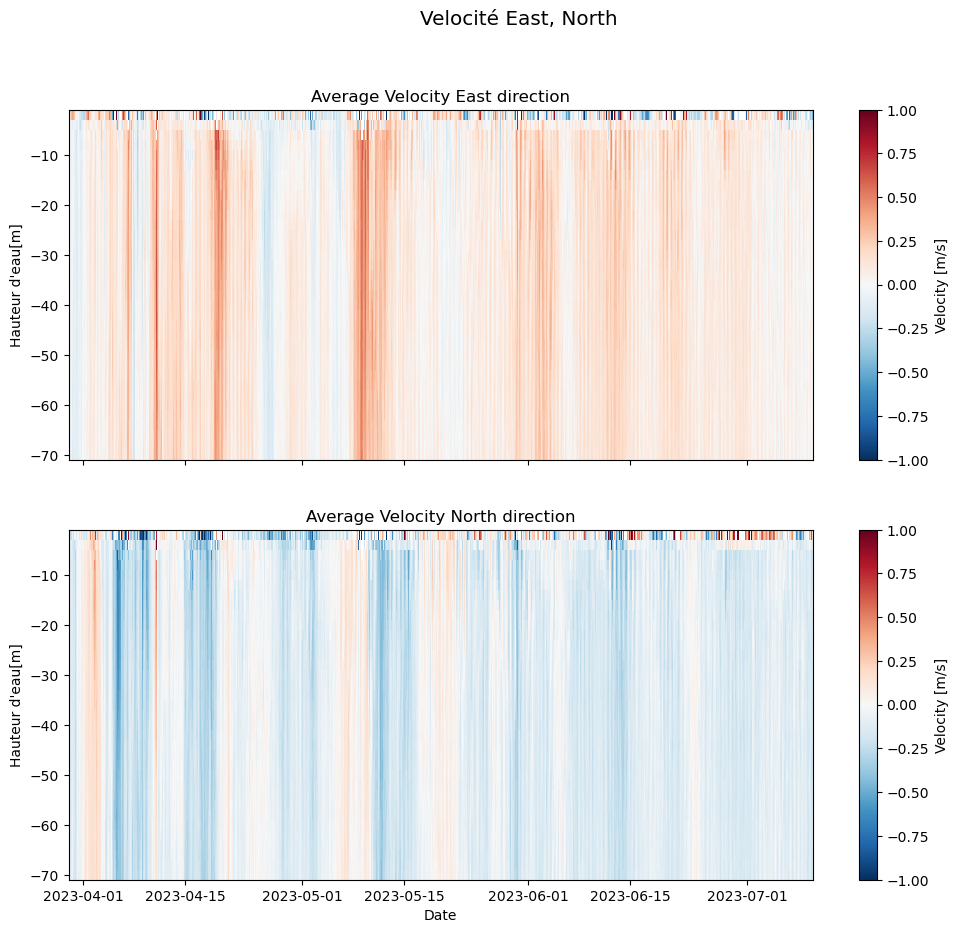

In [27]:
fig, axs = plt.subplots(2, 1, figsize=(12, 10))  # 4 rows, 1 column
plt.suptitle('Velocité East, North', size = 'x-large')
pcm0 = axs[0].pcolormesh(ds_fast_sampling.TIME, ds_fast_sampling.DEPTH.values,ds_fast_sampling.velocity_east.T, cmap='RdBu_r', vmin=-1,vmax=1)
axs[0].set_title('Average Velocity East direction')
axs[0].set_ylabel('Hauteur d\'eau[m]')
axs[0].set_xticklabels([]) 
cbar0 = plt.colorbar(pcm0, ax=axs[0], label='Velocity [m/s]', shrink=1, pad=0.05)

pcm1 = axs[1].pcolormesh(ds_fast_sampling.TIME, ds_fast_sampling.DEPTH.values, ds_fast_sampling.velocity_north.T, cmap='RdBu_r', vmin=-1,vmax=1)
axs[1].set_title('Average Velocity North direction')
axs[1].set_ylabel('Hauteur d\'eau[m]')
cbar1 = plt.colorbar(pcm1, ax=axs[1], label='Velocity [m/s]', shrink=1, pad=0.05)
axs[1].set_xlabel('Date')

In [29]:
dm_FS = ds_fast_sampling.where((ds_fast_sampling.DEPTH <= -8), drop=True)

Text(0.5, 0, 'Date')

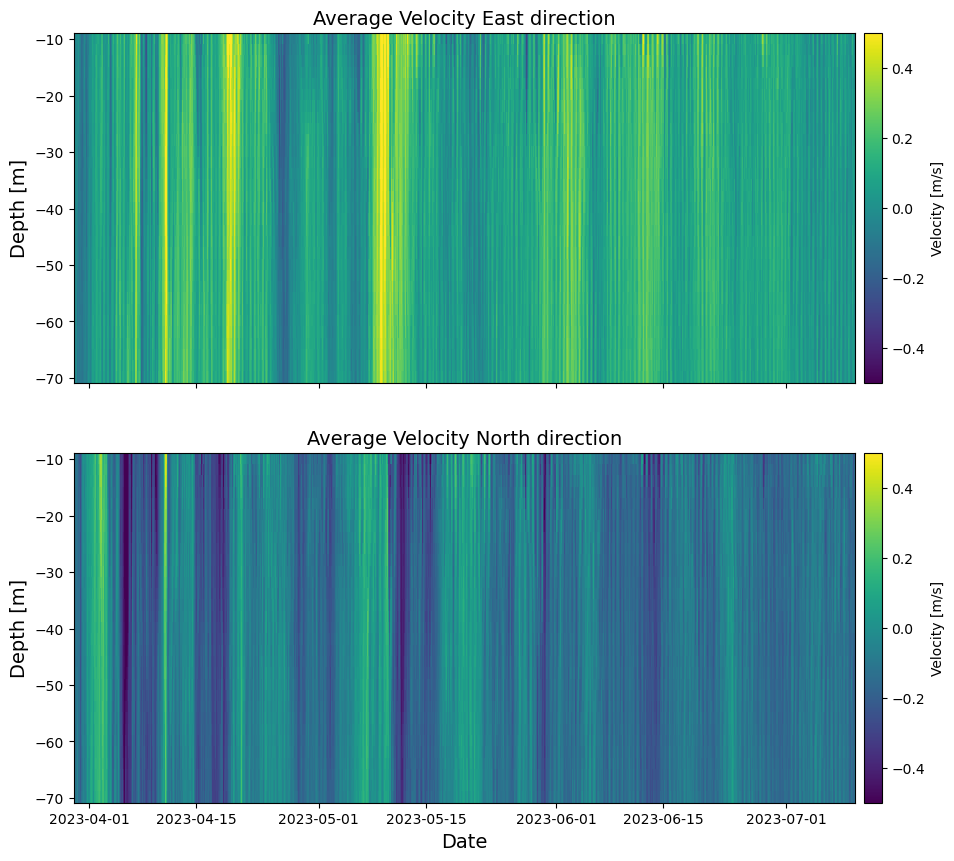

In [31]:
fig, axs = plt.subplots(2, 1, figsize=(12, 10))  # 4 rows, 1 column
# plt.suptitle('Velocity East and North', size = 'x-large')
pcm0 = axs[0].pcolormesh(dm_FS.TIME, dm_FS.DEPTH , dm_FS.velocity_east.T, cmap='viridis', vmin=-0.5,vmax=0.5)
# quiver = axs[0].quiver(dm_FS.TIME, depth , velocity_east.T,velocity_north.T, scale=25)
axs[0].set_title('Average Velocity East direction', fontsize=14)
axs[0].set_ylabel('Depth [m]', fontsize=14)
axs[0].set_xticklabels([]) 
cbar0 = plt.colorbar(pcm0, ax=axs[0], label='Velocity [m/s]', shrink=1, pad=0.01)
# axs[0].set_yticks([-11.99, -20, -30, -40,-50,-60,-70], ['10', '20', '30', '40', '50', '60', '70'])

pcm1 = axs[1].pcolormesh(dm_FS.TIME, dm_FS.DEPTH, dm_FS.velocity_north.T, cmap='viridis', vmin=-0.5,vmax=0.5)
axs[1].set_title('Average Velocity North direction', fontsize=14)
axs[1].set_ylabel('Depth [m]', fontsize=14)
cbar1 = plt.colorbar(pcm1, ax=axs[1], label='Velocity [m/s]', shrink=1, pad=0.01)
axs[1].set_xlabel('Date', fontsize=14)
# axs[1].set_yticks([-11.99, -20, -30, -40,-50,-60,-70], ['10', '20', '30', '40', '50', '60', '70']);
# fig.savefig("velocity_pcm_M2.png", dpi=300)  ;

In [33]:
ek_layer = (ds_fast_sampling.DEPTH >= -70) & (ds_fast_sampling.DEPTH <= -60)
u_surf = ds_fast_sampling.velocity_east.sel(DEPTH=ek_layer)
v_surf = ds_fast_sampling.velocity_north.sel(DEPTH=ek_layer)

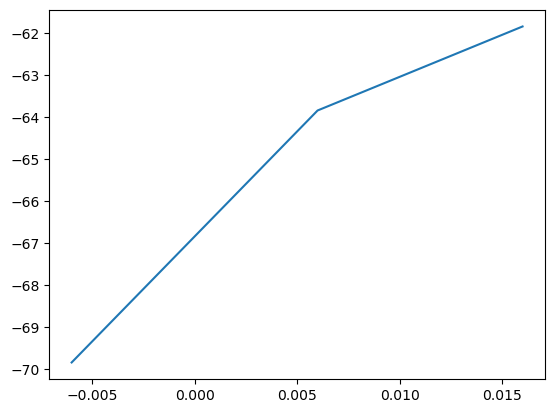

In [35]:
plt.plot(u_surf[100,:], ds_fast_sampling.DEPTH.sel(DEPTH=ek_layer))

- 0.04
- 0.05
- 0.10
- 0.04
- 0.04
- 0.01